In [6]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns

In [2]:
dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme()
sns.set_style("whitegrid")

In [32]:
def lineplot(x, y, filename=None, title=None, xlim=None, ylim=None, ax=None, fig=None):
    if not ax or not fig:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    if show:
        plt.show()
    if filename != None:
        fig.savefig(filename, bbox_inches='tight',
                    transparent=transparent, pad_inches=0, dpi=dpi)
    return fig, ax

In [16]:
def cos(freq, phase):
    return lambda t: np.sqrt(2) * np.cos(TWO_PI * (freq * t - phase))

In [55]:
def taylor_cos(n):
    return lambda x: sum([np.power(-1,k) * np.power(x,k*2) / scipy.special.factorial(k*2) for k in range(n)])

In [54]:
def taylor_sin(n):
    return lambda x: sum([np.power(-1,k) * np.power(x,(2*k+1)) / scipy.special.factorial((2*k+1)) for k in range(n)])

In [68]:
def taylor_exp(n):
    return lambda x: sum([np.power(x,k) / scipy.special.factorial((k)) for k in range(n)])

In [25]:
def plot_cos(freq, phase, filename=None):
    t = np.linspace(0, 1, NUM)
    amp = cos(freq, phase)(t)
    lineplot(t, amp, filename)

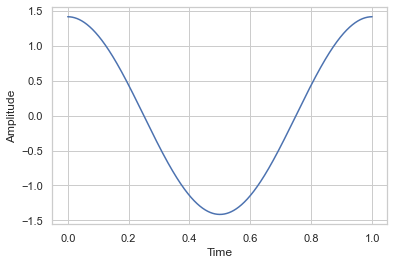

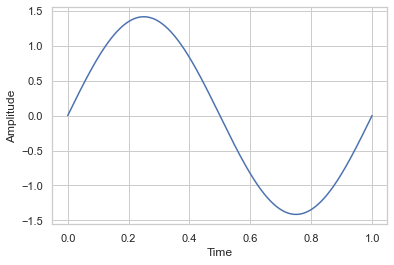

In [34]:
plot_cos(1, 0)
plot_cos(1, 0.25)

In [36]:
quad(lambda t: cos(1, 0)(t) * cos(1,0)(t), 0, 1)

(1.0000000000000002, 7.339841005112145e-10)

In [9]:
np.power(3,2)

9

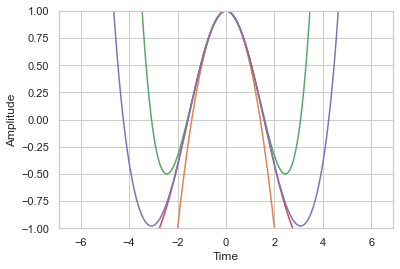

In [63]:
t = np.linspace(-2*np.pi, 2*np.pi, NUM)
N = 6
fig, ax = None, None
for n in range(1,N,1):
    amp = taylor_cos(n)(t)
    fig, ax = lineplot(t, amp, ylim=[-1,1], fig=fig, ax=ax)
    
fig.savefig('taylor_cos', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

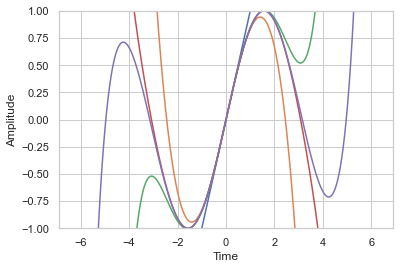

In [65]:
t = np.linspace(-2*np.pi, 2*np.pi, NUM)
N = 6
fig, ax = None, None
for n in range(1,N,1):
    amp = taylor_sin(n)(t)
    fig, ax = lineplot(t, amp, ylim=[-1,1], fig=fig, ax=ax)
    
fig.savefig('taylor_sin', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

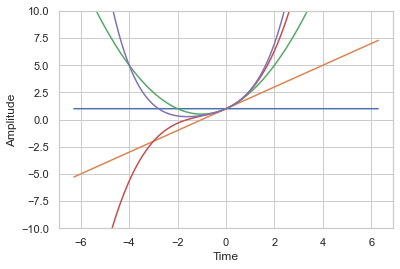

In [72]:
t = np.linspace(-2*np.pi, 2*np.pi, NUM)
N = 6
fig, ax = None, None
for n in range(1,N,1):
    amp = taylor_exp(n)(t)
    fig, ax = lineplot(t, amp, ylim=[-10,10], fig=fig, ax=ax)
    
fig.savefig('taylor_exp', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)